In [2]:
# we will first import all necessary libraries
import pandas as pd
import os
import numpy as np
#import glob
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from shapely.geometry import Point, LineString
#from mpl_toolkits.basemap import Basemap
#import osmnx as ox
#import networkx as nx
import matplotlib as mpl
#from networkx.algorithms import bipartite as bi
#import matplotlib.gridspec as gridspec
#from scipy.stats import spearmanr
#import folium
#import mplleaflet

#from legendgram import legendgram
import mapclassify as mf
#import palettable as pal

wgs84 = {'init':'EPSG:4326'}
bng = {'init':'EPSG:27700'}

In [6]:
# defne the path
file = './../../data/food hazard/FSA_data_competition_2020.csv'
# read the flow file
data = pd.read_csv(file, index_col=None)

C:\Users\tk18583\AppData\Local\Continuum\anaconda3\envs\geo2\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,14,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# get the pharmacies in
fl = './../../data/country_centroids_az8.json'
co = gpd.read_file(fl)
#co = co.to_crs(wgs84)

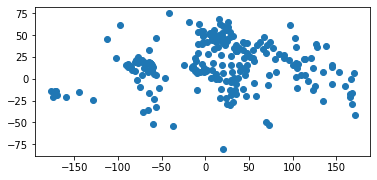

In [8]:
co.plot();

In [9]:
co.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
co.iloc[200:50,15:25]

,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev


In [11]:
data['Country of Origin']

0                USA
1            Belgium
2                USA
3             France
4             France
            ...     
32768        Finland
32769          Italy
32770    Netherlands
32771        Austria
32772        Hungary
Name: Country of Origin, Length: 32773, dtype: object

In [12]:
co.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          241 non-null    object  
 1   FID_        241 non-null    int64   
 2   scalerank   241 non-null    int64   
 3   featurecla  241 non-null    object  
 4   labelrank   241 non-null    int64   
 5   sovereignt  241 non-null    object  
 6   sov_a3      241 non-null    object  
 7   adm0_dif    241 non-null    int64   
 8   level       241 non-null    int64   
 9   type        241 non-null    object  
 10  admin       241 non-null    object  
 11  adm0_a3     241 non-null    object  
 12  geou_dif    241 non-null    int64   
 13  geounit     241 non-null    object  
 14  gu_a3       241 non-null    object  
 15  su_dif      241 non-null    int64   
 16  subunit     241 non-null    object  
 17  su_a3       241 non-null    object  
 18  brk_diff    241 non-null    int64   
 19  

In [13]:
co2 = co.iloc[:,[1,5,19,36,37,38,29,40,41,42,65,66,67]]

In [14]:
co2.head()

,FID_,sovereignt,name,pop_est,gdp_md_est,pop_year,note_brk,gdp_year,economy,income_grp,Longitude,Latitude,geometry
0,0,Netherlands,Aruba,103065.0,2258.0,-99,,-99,6. Developing region,2. High income: nonOECD,-69.982677,12.520880,POINT (-69.98268 12.52088)
1,1,Afghanistan,Afghanistan,28400000.0,22270.0,-99,,-99,7. Least developed region,5. Low income,66.004734,33.835231,POINT (66.00473 33.83523)
2,2,Angola,Angola,12799293.0,110300.0,-99,,-99,7. Least developed region,3. Upper middle income,17.537368,-12.293361,POINT (17.53737 -12.29336)
3,3,United Kingdom,Anguilla,14436.0,108.9,-99,,-99,6. Developing region,3. Upper middle income,-63.064989,18.223960,POINT (-63.06499 18.22396)
4,4,Albania,Albania,3639453.0,21810.0,-99,,-99,6. Developing region,4. Lower middle income,20.049834,41.142450,POINT (20.04983 41.14245)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32773 entries, 0 to 32772
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           32773 non-null  object
 1   Date Added                   32773 non-null  object
 2   Date of Publishing           32773 non-null  object
 3   Data Source                  32773 non-null  object
 4   Source Type                  32773 non-null  object
 5   Alert Type                   32773 non-null  object
 6   Raw Product Phrase           32773 non-null  object
 7   Product Category             29500 non-null  object
 8   Commodity / Product          31519 non-null  object
 9   Country of Origin            32056 non-null  object
 10  Eu/non-EU Country of Origin  32010 non-null  object
 11  Notified by                  31274 non-null  object
 12  EU/non-EU Notifying Country  31262 non-null  object
 13  Incident Title               32

In [35]:
data['loop'] = np.where((data['Country of Origin'] == data['Notified by']), 'Yes', 'No')
data['na'] = np.where((data['Country of Origin'].isna() |data['Notified by'].isna()), 'Yes', 'No')


In [67]:
data['class'] = 'Identified by other country'
data['class'][data['loop'] == 'Yes'] = 'Identified within the country'
data['class'][data['na'] == 'Yes'] = 'Unknown identifier'

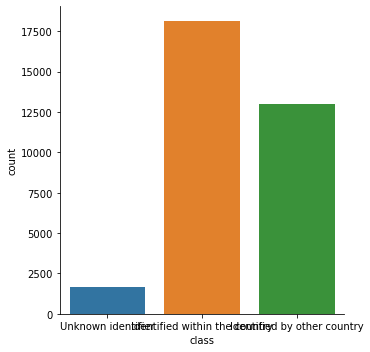

In [72]:
sns.catplot(x="class", kind="count", data=data);

In [69]:
x1 = data.loc[data['class'] == 'Identified by other country',]
x2 = data.loc[data['class'] == 'Identified within the country',]
x3 = data.loc[data['class'] == 'Unknown identifier',]

In [75]:
data['Alert Type'].unique()

array(['outbreak', 'warning', 'recall', 'information for attention',
       'border rejection', 'alert', 'lookout',
       'information for follow-up', 'update', 'information'], dtype=object)

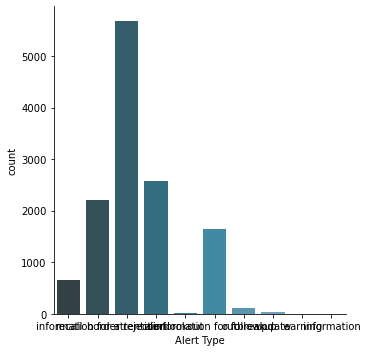

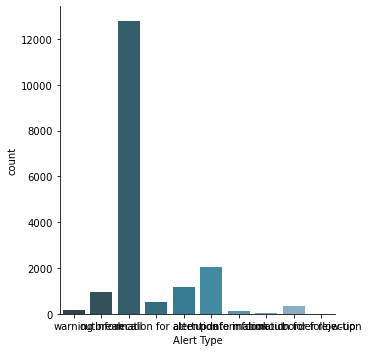

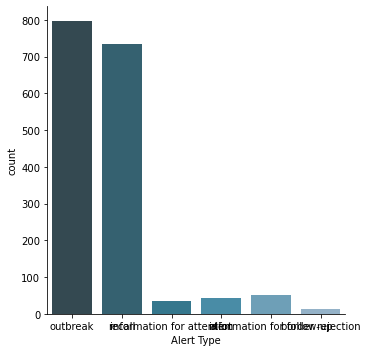

In [79]:
sns.catplot(x="Alert Type", kind="count", palette="PuBuGn_d", data=x1);
sns.catplot(x="Alert Type", kind="count", palette="PuBuGn_d", data=x2);
sns.catplot(x="Alert Type", kind="count", palette="PuBuGn_d", data=x3);

In [81]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18134 entries, 1 to 32771
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           18134 non-null  object
 1   Date Added                   18134 non-null  object
 2   Date of Publishing           18134 non-null  object
 3   Data Source                  18134 non-null  object
 4   Source Type                  18134 non-null  object
 5   Alert Type                   18134 non-null  object
 6   Raw Product Phrase           18134 non-null  object
 7   Product Category             15576 non-null  object
 8   Commodity / Product          17170 non-null  object
 9   Country of Origin            18134 non-null  object
 10  Eu/non-EU Country of Origin  18134 non-null  object
 11  Notified by                  18134 non-null  object
 12  EU/non-EU Notifying Country  18130 non-null  object
 13  Incident Title               18

In [103]:
z3= x3.iloc[:,[9,5,0]].groupby(['Country of Origin','Alert Type']).count().reset_index().rename(columns={'ID':'count'})
z3

,Country of Origin,Alert Type,count
0,Argentina,outbreak,2
1,Australia,outbreak,15
2,Australia,recall,7
3,Austria,outbreak,3
4,Bangladesh,recall,1
...,...,...,...
79,United Kingdom,outbreak,14
80,United Kingdom,recall,9
81,Venezuela,outbreak,1
82,Vietnam,outbreak,3


In [104]:
z3['Country of Origin'].unique()

array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belgium',
       'Brazil', 'Canada', 'Chile', 'China', 'Costa Rica', 'Denmark',
       'Egypt', 'Estonia', 'France', 'Gabon', 'Georgia', 'Germany',
       'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kenya', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mexico', 'Morocco', 'Myanmar', 'Netherlands',
       'New Zealand', 'Nigeria', 'Norway', 'Palestinian Territories',
       'Peru', 'Philippines', 'Poland', 'Russia', 'Singapore', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Tunisia', 'Turkey', 'USA', 'Uganda', 'United Kingdom',
       'Venezuela', 'Vietnam'], dtype=object)

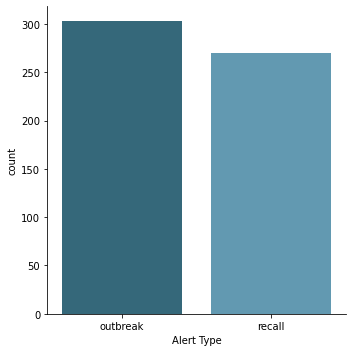

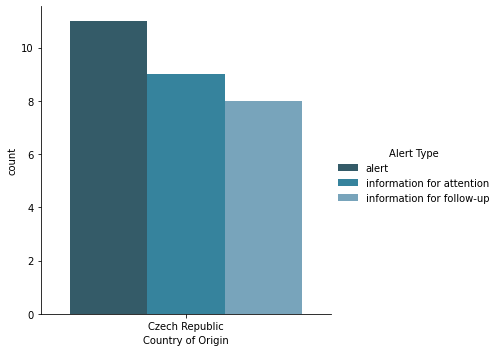

In [107]:
sns.catplot(x="Alert Type", y="count", palette="PuBuGn_d", data=z3.loc[z3['Country of Origin'] == 'USA',],  kind = 'bar');
sns.catplot(x='Country of Origin', y="count", palette="PuBuGn_d",hue = "Alert Type", kind = 'bar' , data=z2.loc[(z2['Country of Origin'] == 'Czech Republic'),]);

In [ ]:
sns.catplot(x="Hazard Group", kind="count", palette="ch:.25", data=with_loop);

In [61]:
data['Hazard Group'].unique()

array(['pathogenic micro-organisms', 'allergens',
       'microbial contaminants (other)',
       'biological contaminants (other)', 'natural toxins (other)',
       'environmental pollutants', 'Fraud', 'industrial contaminants',
       'heavy metals', 'Adulteration', 'TSEs', 'Radiation',
       'foreign bodies', 'migration', 'mycotoxins',
       'packaging defective / food contact material',
       'not determined / other', 'chemical contamination', 'novel food',
       'residues of veterinary medicinal products',
       'Unauthorised Pesticides', 'process contaminants',
       'Use-by date exceeded', 'labelling absent/incomplete/incorrect',
       'composition', 'parasitic infestation',
       'food additives and flavourings', 'poor or insufficient controls',
       'pesticide residues', 'organoleptic aspects',
       'Supplements: Unauthorised substance',
       'genetically modified food or feed', 'Non-compliance',
       'feed additives', 'unclassified'], dtype=object)

In [49]:
with_loop = data.loc[data['loop'] == 'Yes',]
no_loop = data.loc[data['loop'] == 'No',]
len(no_loop)

14639

In [52]:
len(with_loop)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32773 entries, 0 to 32772
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           32773 non-null  object
 1   Date Added                   32773 non-null  object
 2   Date of Publishing           32773 non-null  object
 3   Data Source                  32773 non-null  object
 4   Source Type                  32773 non-null  object
 5   Alert Type                   32773 non-null  object
 6   Raw Product Phrase           32773 non-null  object
 7   Product Category             29500 non-null  object
 8   Commodity / Product          31519 non-null  object
 9   Country of Origin            32056 non-null  object
 10  Eu/non-EU Country of Origin  32010 non-null  object
 11  Notified by                  31274 non-null  object
 12  EU/non-EU Notifying Country  31262 non-null  object
 13  Incident Title               32

In [51]:
print(str( len(with_loop.loc[with_loop['na']=='No',])))
print(str( len(no_loop.loc[no_loop['na']=='No',])))

18134
12967


In [55]:
data.iloc[:,[9,11,23, 24,25]].head()

,Country of Origin,Notified by,loop,na,class
0,USA,NaN,No,Yes,Unknown identifier
1,Belgium,Belgium,Yes,No,Detected within the country
2,USA,USA,Yes,No,Detected within the country
3,France,France,Yes,No,Detected within the country
4,France,France,Yes,No,Detected within the country


In [14]:
data.iloc[:,[9,11,23]].isna().describe()

,Country of Origin,Notified by,loop
count,32773,32773,32773
unique,2,2,1
top,False,False,False
freq,32056,31274,32773


In [15]:
x = data.loc[data['loop'] == 0,:]
x.iloc[:,[9,11,23]].isna().describe()

,Country of Origin,Notified by,loop
count,14639,14639,14639
unique,2,2,1
top,False,False,False
freq,13922,13140,14639


In [16]:
x.head()

,ID,Date Added,Date of Publishing,Data Source,Source Type,Alert Type,Raw Product Phrase,Product Category,Commodity / Product,Country of Origin,...,Hazard Description,Hazard Group,Summary,Link,"Food, Feed or FCM",Manufacturer,Brand,Organisations,Is A Food Article,loop
0,218213,21/05/2020,21/05/2020,FoodSafetyNews.com,Others,outbreak,Almost 100 sick in Salmonella outbreak linked ...,poultry meat and poultry meat products,poultry,USA,...,salmonella outbreak,pathogenic micro-organisms,salmonella outbreak: backyard poultry flocks,https://www.foodsafetynews.com/2020/05/almost-...,food,NaN,NaN,The Centers for Disease Control and Prevention...,Yes,0
7,218205,21/05/2020,20/05/2020,Food Safety Authority (Ireland),Official,recall,Milk Not Labelled in English on Batches of Mag...,milk and milk products,white chocolate ice cream tub pack size end,United Kingdom,...,food allergen milk,allergens,food allergen milk: magnum white chocolate ic...,https://www.fsai.ie/news_centre/allergen_alert...,food,NaN,NaN,L9255AT138 & L9255BT138best,Yes,0
14,218182,20/05/2020,19/05/2020,FoodSafetyNews.com,Others,outbreak,Salmonella outbreak linked to cafe; mushroom p...,fruits and vegetables,mushroom,Australia,...,salmonella poisoning,natural toxins (other),salmonella poisoning: mushroom poisonings,https://www.foodsafetynews.com/2020/05/salmone...,food,NaN,NaN,the Victorian Department of Health and Human S...,Yes,0
15,218183,20/05/2020,19/05/2020,Food Safety Authority (Ireland),Official,recall,Undeclared Milk in Youngs Simply Breaded 2 Ext...,fish and fish products,young fish fillet pack size end,United Kingdom,...,undeclared milk,allergens,undeclared milk: youngs simply breaded 2 extra...,https://www.fsai.ie/news_centre/allergen_alert...,food,NaN,NaN,"AC L 0097, AB L 0114 & AB L",Yes,0
16,218187,20/05/2020,19/05/2020,Agriculture & Food Agency (Croatia),Official,recall,"Recall products, Rice oil",cereals and bakery products,rice,Thailand,...,rice oil,environmental pollutants,rice oil: rice oil,https://www.hapih.hr/opoziv-proizvoda-rizino-u...,food,NaN,NaN,"NizozemskaStavlja, the European Agency for foo...",Yes,0


In [17]:
df = nx.from_pandas_edgelist(x, source='Country of Origin', target='Notified by', edge_attr=True)

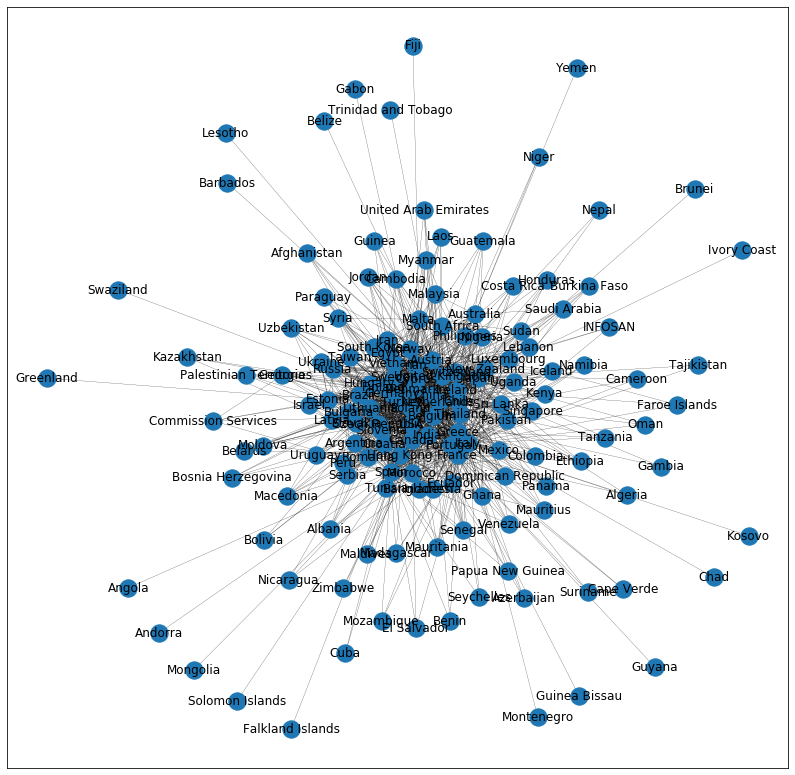

In [18]:
plt.figure(figsize=(14,14))
nx.draw_networkx(df, with_labels=True, width=0.2)


In [19]:
# Look at number on graph properties
nb_nodes = len(df.nodes())
nb_arr = len(df.edges())
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

Number of nodes : 152
Number of edges : 1346


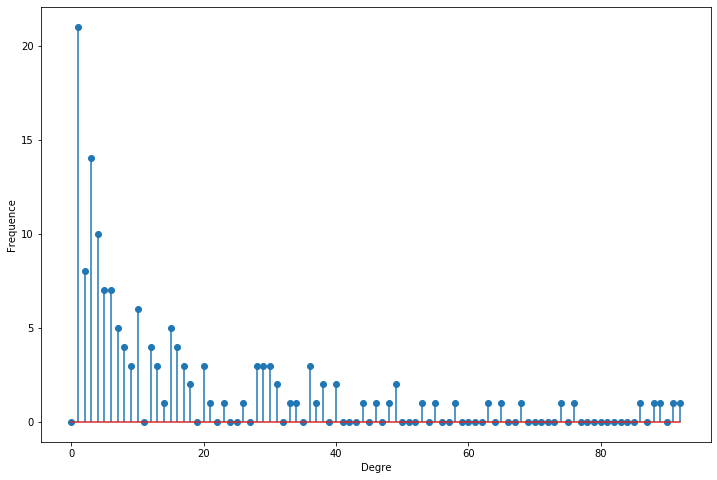

In [20]:
degree_freq = np.array(nx.degree_histogram(df)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq, use_line_collection=True)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

In [21]:
# fix

data['Country of Origin'] = data['Country of Origin'].replace(['USA'],'United States')
#data['Country of Origin'] = data['Country of Origin'].replace(['South Korea'],'United States')
data['Country of Origin'] = data['Country of Origin'].replace(['Czech Republic'],'Czech Rep.')
data['Country of Origin'] = data['Country of Origin'].replace(['Palestinian Territories'],'Palestine')
data['Country of Origin'] = data['Country of Origin'].replace(['Dominican Republic'],'Dominican Rep.')
#data['Country of Origin'] = data['Country of Origin'].replace(['INFOSAN'],'United States')
data['Country of Origin'] = data['Country of Origin'].replace(['Laos'], 'Lao PDR')
data['Country of Origin'] = data['Country of Origin'].replace(['Bosnia Herzegovina'], 'Bosnia and Herz.')
data['Country of Origin'] = data['Country of Origin'].replace([ 'Faroe Islands'],  'Faeroe Is.')
data['Country of Origin'] = data['Country of Origin'].replace(['Guinea Bissau'], 'Guinea-Bissau')
data['Country of Origin'] = data['Country of Origin'].replace(['Falkland Islands'], 'Falkland Is.')
data['Country of Origin'] = data['Country of Origin'].replace([ 'Solomon Islands'], 'Solomon Is.')
#data['Country of Origin'] = data['Country of Origin'].replace([ 'Ivory Coast'], 'Ivory Coast')


data['Notified by'] = data['Notified by'].replace(['USA'],'United States')
#data['Notified by'] = data['Notified by'].replace(['South Korea'],'United States')
data['Notified by'] = data['Notified by'].replace(['Czech Republic'],'Czech Rep.')
data['Notified by'] = data['Notified by'].replace(['Palestinian Territories'],'Palestine')
data['Notified by'] = data['Notified by'].replace(['Dominican Republic'],'Dominican Rep.')
#data['Notified by'] = data['Notified by'].replace(['INFOSAN'],'United States')
data['Notified by'] = data['Notified by'].replace(['Laos'], 'Lao PDR')
data['Notified by'] = data['Notified by'].replace(['Bosnia Herzegovina'], 'Bosnia and Herz.')
data['Notified by'] = data['Notified by'].replace([ 'Faroe Islands'],  'Faeroe Is.')
data['Notified by'] = data['Notified by'].replace(['Guinea Bissau'], 'Guinea-Bissau')
data['Notified by'] = data['Notified by'].replace(['Falkland Islands'], 'Falkland Is.')
data['Notified by'] = data['Notified by'].replace([ 'Solomon Islands'], 'Solomon Is.')
#data['Notified by'] = data['Notified by'].replace([ 'Ivory Coast'], 'Ivory Coast')

In [22]:
# create separate x and y in the data
co2['x'] = co2.geometry.x
co2['y'] = co2.geometry.y

# set index of the la data for the lad id
co2.set_index('name', inplace=True)

# create a dictionary of the la ids and their coordinates 
# this is for position for the maps
pos = {co2: (v['x'], v['y'])
       for co2, v in
       co2.to_dict('index').items()}

C:\Users\tk18583\AppData\Local\Continuum\anaconda3\envs\geonet\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tk18583\AppData\Local\Continuum\anaconda3\envs\geonet\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
co2['name'] = co2.index
pos

C:\Users\tk18583\AppData\Local\Continuum\anaconda3\envs\geonet\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Aruba': (-69.9826771125, 12.5208803838),
 'Afghanistan': (66.0047336558, 33.8352307278),
 'Angola': (17.5373676815, -12.2933605438),
 'Anguilla': (-63.0649892654, 18.2239595023),
 'Albania': (20.0498339611, 41.1424498947),
 'Aland': (19.953287676, 60.2148868756),
 'Andorra': (1.56054377918, 42.5422910219),
 'United Arab Emirates': (54.3001671016, 23.9052818785),
 'Argentina': (-65.179806925, -35.3813487953),
 'Armenia': (44.9299327564, 40.2895256919),
 'American Samoa': (-170.718025746, -14.3044599708),
 'Antarctica': (19.9210895122, -80.5085791311),
 'Ashmore and Cartier Is.': (123.583837891, -12.4299316406),
 'Fr. S. Antarctic Lands': (69.2266675845, -49.2489548494),
 'Antigua and Barb.': (-61.794693427, 17.2774995986),
 'Australia': (134.491000082, -25.7328870417),
 'Austria': (14.1264760996, 47.585494392),
 'Azerbaijan': (47.5459987892, 40.2882723471),
 'Burundi': (29.8751215645, -3.35939665747),
 'Belgium': (4.64065113918, 50.6398157556),
 'Benin': (2.32785254449, 9.64175970225)

In [66]:
data.loc[(data['Country of Origin'] == 'France'),['ID','Country of Origin','Notified by']]
x.loc[(x['Country of Origin'] == 'France'),['ID','Country of Origin','Notified by']]

,ID,Country of Origin,Notified by
107,217980,France,Belgium
131,217934,France,Italy
417,217125,France,Germany
439,216995,France,Sweden
532,216609,France,Germany
...,...,...,...
31399,172759-72752,France,Japan
31400,172760-72752,France,Japan
31401,172761-72752,France,Japan
32519,107932,France,Belgium


In [24]:
pos['South Korea'] = (126.705208, 37.456257)
pos['Ivory Coast'] = (-4.024429, 5.345317)
pos['Commission Services'] = (0, 0)
pos['INFOSAN'] = (0,0)

----------------------------

In [25]:
co2['name'].isin(list(data['Country of Origin'])).describe()

count      241
unique       2
top       True
freq       147
Name: name, dtype: object

In [26]:
data['name_right_origin'] = data['Country of Origin'].isin(list(co2['name']))
data['name_right_dest'] = data['Notified by'].isin(list(co2['name']))

In [27]:
data['Country of Origin'].loc[data['name_right_origin'] == False].unique()

array([nan, 'South Korea', 'INFOSAN', 'Ivory Coast'], dtype=object)

In [28]:
data['name_right_origin'] = data['Country of Origin'].isin(list(co2['name']))
data['name_right_dest'] = data['Notified by'].isin(list(co2['name']))

data['Country of Origin'].loc[data['name_right_origin'] == False].unique()

array([nan, 'South Korea', 'INFOSAN', 'Ivory Coast'], dtype=object)

In [29]:
data['Notified by'].loc[data['name_right_dest'] == False].unique()

array([nan, 'Commission Services'], dtype=object)

In [30]:
x = data.loc[data['loop'] == 0,:]
x.iloc[:,[9,11,23]].isna().describe()

,Country of Origin,Notified by,loop
count,14639,14639,14639
unique,2,2,1
top,False,False,False
freq,13922,13140,14639


In [31]:
x =  x.loc[data['Country of Origin'].isna() == False ,:]
x =  x.loc[data['Notified by'].isna() == False ,:]
x.iloc[:,[9,11,23]].isna().describe()

,Country of Origin,Notified by,loop
count,12967,12967,12967
unique,1,1,1
top,False,False,False
freq,12967,12967,12967


In [86]:
x

,ID,Date Added,Date of Publishing,Data Source,Source Type,Alert Type,Raw Product Phrase,Product Category,Commodity / Product,Country of Origin,...,Summary,Link,"Food, Feed or FCM",Manufacturer,Brand,Organisations,Is A Food Article,loop,name_right_origin,name_right_dest
7,218205,21/05/2020,20/05/2020,Food Safety Authority (Ireland),Official,recall,Milk Not Labelled in English on Batches of Mag...,milk and milk products,white chocolate ice cream tub pack size end,United Kingdom,...,food allergen milk: magnum white chocolate ic...,https://www.fsai.ie/news_centre/allergen_alert...,food,NaN,NaN,L9255AT138 & L9255BT138best,Yes,0,True,True
15,218183,20/05/2020,19/05/2020,Food Safety Authority (Ireland),Official,recall,Undeclared Milk in Youngs Simply Breaded 2 Ext...,fish and fish products,young fish fillet pack size end,United Kingdom,...,undeclared milk: youngs simply breaded 2 extra...,https://www.fsai.ie/news_centre/allergen_alert...,food,NaN,NaN,"AC L 0097, AB L 0114 & AB L",Yes,0,True,True
16,218187,20/05/2020,19/05/2020,Agriculture & Food Agency (Croatia),Official,recall,"Recall products, Rice oil",cereals and bakery products,rice,Thailand,...,rice oil: rice oil,https://www.hapih.hr/opoziv-proizvoda-rizino-u...,food,NaN,NaN,"NizozemskaStavlja, the European Agency for foo...",Yes,0,True,True
19,218171,19/05/2020,18/05/2020,RASFF Portal,Official,information for attention,Salmonella enterica ser. Derby (presence /25g)...,poultry meat and poultry meat products,chicken,Poland,...,Salmonella enterica ser Derby: chicken breast ...,https://webgate.ec.europa.eu/rasff-window/port...,food,NaN,NaN,NaN,Yes,0,True,True
20,218174,19/05/2020,18/05/2020,RASFF Portal,Official,border rejection,Salmonella enterica ser. Infantis (presence /2...,NaN,maize,Russia,...,Salmonella enterica ser Infantis: maize,https://webgate.ec.europa.eu/rasff-window/port...,feed,NaN,NaN,NaN,Yes,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32766,127824,13/03/2019,30/06/2016,RASFF Portal,Official,alert,lead (11 mg/kg - ppm) in food supplement (orga...,"dietetic foods, food supplements, fortified foods",food supplement powder,United Kingdom,...,: food supplement (organic rhodiola rosea powder),https://webgate.ec.europa.eu/rasff-window/port...,food,NaN,NaN,"organic rhodiola rosea powder, dietetic foods",Yes,0,True,True
32767,127972,13/03/2019,13/06/2016,RASFF Portal,Official,alert,lead (4.3 mg/kg - ppm) in diatomaceous earth f...,"dietetic foods, food supplements, fortified foods",diatomaceous earth,United Kingdom,...,: diatomaceous earth,https://webgate.ec.europa.eu/rasff-window/port...,food,NaN,NaN,dietetic foods,Yes,0,True,True
32768,128010,13/03/2019,07/06/2016,RASFF Portal,Official,information for follow-up,lead (201 mg/kg - ppm) in reindeer meal from F...,feed materials,reindeer meal,Finland,...,: reindeer meal,https://webgate.ec.europa.eu/rasff-window/port...,feed,NaN,NaN,NaN,Yes,0,True,True
32770,128204,13/03/2019,13/05/2016,RASFF Portal,Official,alert,lead (19.1 mg/kg - ppm) in food supplement fro...,"dietetic foods, food supplements, fortified foods",food supplement,Netherlands,...,: food supplement,https://webgate.ec.europa.eu/rasff-window/port...,food,NaN,NaN,dietetic foods,Yes,0,True,True


In [32]:
df = nx.from_pandas_edgelist(x, source='Country of Origin', target='Notified by', edge_attr=True)

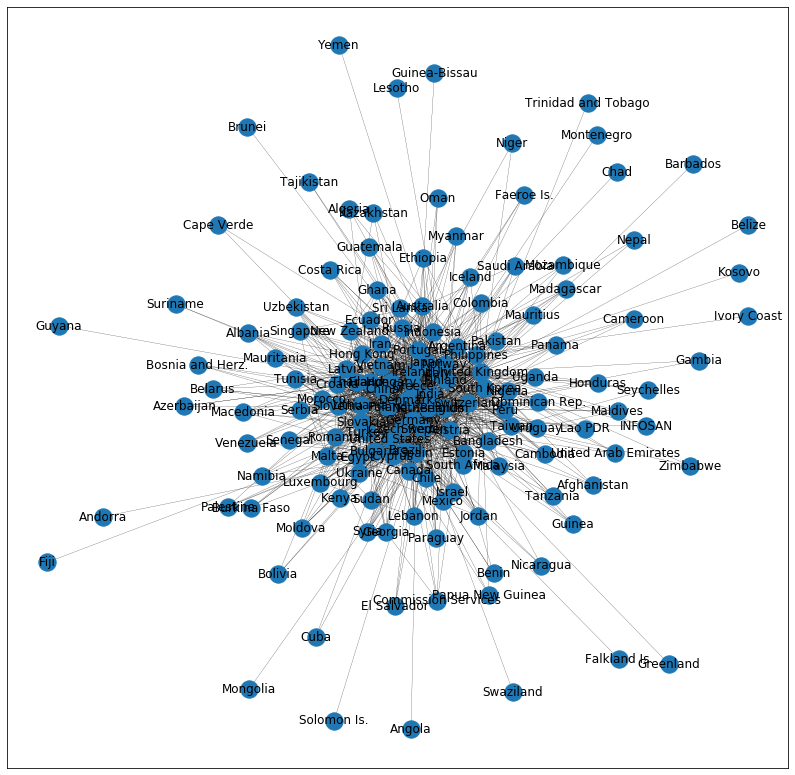

In [67]:
plt.figure(figsize=(14,14))
nx.draw_networkx(df, with_labels=True, width=0.2)


In [34]:
# Look at number on graph properties
nb_nodes = len(df.nodes())
nb_arr = len(df.edges())
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

Number of nodes : 150
Number of edges : 1284


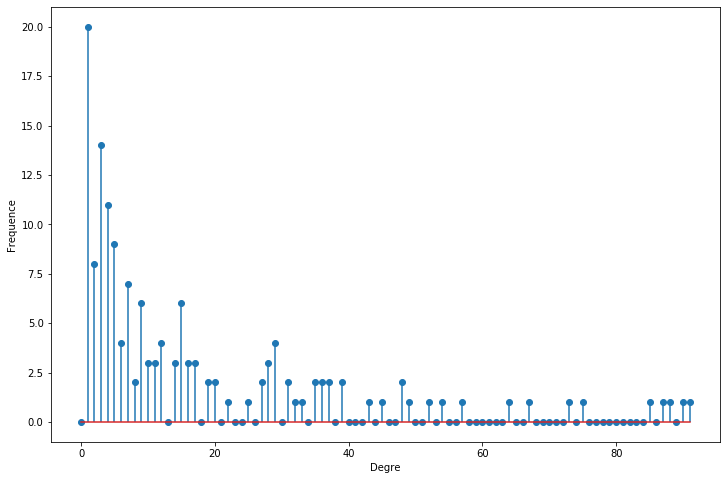

In [35]:
degree_freq = np.array(nx.degree_histogram(df)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq, use_line_collection=True)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

In [36]:
c_degree = nx.degree_centrality(df)
c_degree = list(c_degree.values())

In [81]:
pos

{'Aruba': (-69.9826771125, 12.5208803838),
 'Afghanistan': (66.0047336558, 33.8352307278),
 'Angola': (17.5373676815, -12.2933605438),
 'Anguilla': (-63.0649892654, 18.2239595023),
 'Albania': (20.0498339611, 41.1424498947),
 'Aland': (19.953287676, 60.2148868756),
 'Andorra': (1.56054377918, 42.5422910219),
 'United Arab Emirates': (54.3001671016, 23.9052818785),
 'Argentina': (-65.179806925, -35.3813487953),
 'Armenia': (44.9299327564, 40.2895256919),
 'American Samoa': (-170.718025746, -14.3044599708),
 'Antarctica': (19.9210895122, -80.5085791311),
 'Ashmore and Cartier Is.': (123.583837891, -12.4299316406),
 'Fr. S. Antarctic Lands': (69.2266675845, -49.2489548494),
 'Antigua and Barb.': (-61.794693427, 17.2774995986),
 'Australia': (134.491000082, -25.7328870417),
 'Austria': (14.1264760996, 47.585494392),
 'Azerbaijan': (47.5459987892, 40.2882723471),
 'Burundi': (29.8751215645, -3.35939665747),
 'Belgium': (4.64065113918, 50.6398157556),
 'Benin': (2.32785254449, 9.64175970225)

In [83]:
pos['France'] = (2.76172944519, 47.206597)

In [88]:
nx.nodes(df)

NodeView(('United Kingdom', 'Ireland', 'Thailand', 'Croatia', 'Poland', 'Lithuania', 'Russia', 'Finland', 'Ethiopia', 'Netherlands', 'Czech Rep.', 'Italy', 'Sweden', 'Brazil', 'Romania', 'France', 'India', 'Slovakia', 'Vietnam', 'Belgium', 'Cuba', 'United States', 'Canada', 'Germany', 'Latvia', 'Greece', 'Sri Lanka', 'Ghana', 'Spain', 'Hungary', 'Turkey', 'New Zealand', 'Sudan', 'Ukraine', 'South Africa', 'Switzerland', 'Senegal', 'Portugal', 'Indonesia', 'China', 'Niger', 'Australia', 'Austria', 'Denmark', 'Bulgaria', 'Nigeria', 'South Korea', 'Panama', 'Jordan', 'Slovenia', 'Palestine', 'Macedonia', 'Afghanistan', 'Argentina', 'Uruguay', 'Algeria', 'Morocco', 'Norway', 'Cyprus', 'Estonia', 'Bolivia', 'Iran', 'Serbia', 'Hong Kong', 'Chile', 'Egypt', 'Iceland', 'Luxembourg', 'Peru', 'Singapore', 'Georgia', 'Syria', 'El Salvador', 'Mexico', 'Guinea', 'Japan', 'Gambia', 'Commission Services', 'Israel', 'Kenya', 'Cameroon', 'Uganda', 'Philippines', 'Malta', 'Albania', 'Saudi Arabia', 'Cam

df[5]

In [93]:
# define min and max for the colorbar, divisions and colormap
mn = min(c_degree)
mx = max(c_degree)
N = 10
cmap = plt.get_cmap('inferno',N)



# set up a figure
fig, ax = plt.subplots(figsize=(15,15))

# basemap
mplleaflet.display(fig=ax.figure)

# draw
up = nx.draw_networkx(df,pos,cmap = plt.get_cmap('inferno'),node_color =c_degree, node_size = 100, width=0.1, with_labels=True)



# create the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=mn, vmax=mx))
sm.set_array([])
cbar = plt.colorbar(sm,orientation="horizontal",fraction=500,anchor=(150,-30.0))

#fig.savefig('./mig3.png')
#plt.close(fig)
mplleaflet.show()
plt.show()

In [158]:
# define min and max for the colorbar, divisions and colormap
mn = min(c_degree)
mx = max(c_degree)
N = 10
cmap = plt.get_cmap('inferno',N)



# set up a figure
fig, ax = plt.subplots(figsize=(15,15))

# basemap
mplleaflet.display(fig=ax.figure)

# draw
up = nx.draw_networkx(g,pos,cmap = plt.get_cmap('inferno'),node_color =c_degree, node_size = 100, width=0.1, with_labels=True)


# create the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=mn, vmax=mx))
sm.set_array([])
cbar = plt.colorbar(sm,orientation="horizontal",fraction=500,anchor=(150,-30.0))

#fig.savefig('./mig3.png')
#plt.close(fig)
mplleaflet.show()
plt.show()

ValueError: Unrecognized code: S

In [39]:
M = nx.from_pandas_edgelist(x, 'Country of Origin', 'Notified by', create_using=nx.MultiDiGraph())
print(M.is_directed(), M.is_multigraph())

True True


In [153]:
c_in_degree = nx.in_degree_centrality(M)
c_in_degree2 = list(c_in_degree.values())

c_out_degree = nx.out_degree_centrality(M)
c_out_degree2 = list(c_out_degree.values())

In [41]:
co3 = co2.iloc[:,[12,13]]

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12967 entries, 7 to 32772
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           12967 non-null  object
 1   Date Added                   12967 non-null  object
 2   Date of Publishing           12967 non-null  object
 3   Data Source                  12967 non-null  object
 4   Source Type                  12967 non-null  object
 5   Alert Type                   12967 non-null  object
 6   Raw Product Phrase           12967 non-null  object
 7   Product Category             12476 non-null  object
 8   Commodity / Product          12898 non-null  object
 9   Country of Origin            12967 non-null  object
 10  Eu/non-EU Country of Origin  12924 non-null  object
 11  Notified by                  12967 non-null  object
 12  EU/non-EU Notifying Country  12959 non-null  object
 13  Incident Title               12

In [43]:
z = x.iloc[:,[9,11, 23]].groupby(['Country of Origin','Notified by']).count().reset_index()
z 

,Country of Origin,Notified by,loop
0,Afghanistan,Denmark,1
1,Afghanistan,Finland,1
2,Afghanistan,Sweden,2
3,Afghanistan,United Kingdom,2
4,Albania,Croatia,4
...,...,...,...
1446,Vietnam,United Kingdom,14
1447,Vietnam,United States,12
1448,Yemen,Australia,1
1449,Zimbabwe,Netherlands,1


In [44]:
fin = pd.merge(z,co3, left_on = 'Country of Origin', right_on = 'name', how = 'left')
fin = pd.merge(fin,co3, left_on = 'Notified by', right_on = 'name', how = 'left')

# , target='Notified by' 

In [45]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1450
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country of Origin  1451 non-null   object 
 1   Notified by        1451 non-null   object 
 2   loop               1451 non-null   int64  
 3   x_x                1428 non-null   float64
 4   y_x                1428 non-null   float64
 5   x_y                1446 non-null   float64
 6   y_y                1446 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 90.7+ KB


In [46]:
fin.describe()

,loop,x_x,y_x,x_y,y_y
count,1451.000000,1428.000000,1428.000000,1446.000000,1446.000000
mean,8.936595,22.317013,28.016024,15.958952,47.486586
std,24.293637,60.507023,25.562449,41.065843,13.345972
min,1.000000,-112.461674,-51.744840,-112.461674,-41.811136
25%,1.000000,-2.865632,13.097864,4.640651,42.173440
50%,2.000000,19.395591,36.561765,12.070013,49.733412
75%,7.000000,54.300167,47.162775,19.479052,54.123872
max,362.000000,171.484923,74.710513,171.484923,68.750156


In [279]:
fin.loc[fin['loop'] <300,:]

,Country of Origin,Notified by,loop,x_x,y_x,x_y,y_y
0,Afghanistan,Denmark,1,66.004734,33.835231,10.028010,55.981253
1,Afghanistan,Finland,1,66.004734,33.835231,26.274666,64.498846
2,Afghanistan,Sweden,2,66.004734,33.835231,16.745580,62.779665
3,Afghanistan,United Kingdom,2,66.004734,33.835231,-2.865632,54.123872
4,Albania,Croatia,4,20.049834,41.142450,16.404129,45.080476
...,...,...,...,...,...,...,...
1446,Vietnam,United Kingdom,14,106.299147,16.646017,-2.865632,54.123872
1447,Vietnam,United States,12,106.299147,16.646017,-112.461674,45.679547
1448,Yemen,Australia,1,47.586762,15.909280,134.491000,-25.732887
1449,Zimbabwe,Netherlands,1,29.851441,-19.004204,5.281448,52.100790


In [151]:
g = nx.from_pandas_edgelist(x, source='Country of Origin', target='Notified by', edge_attr=True, create_using=nx.MultiDiGraph() )

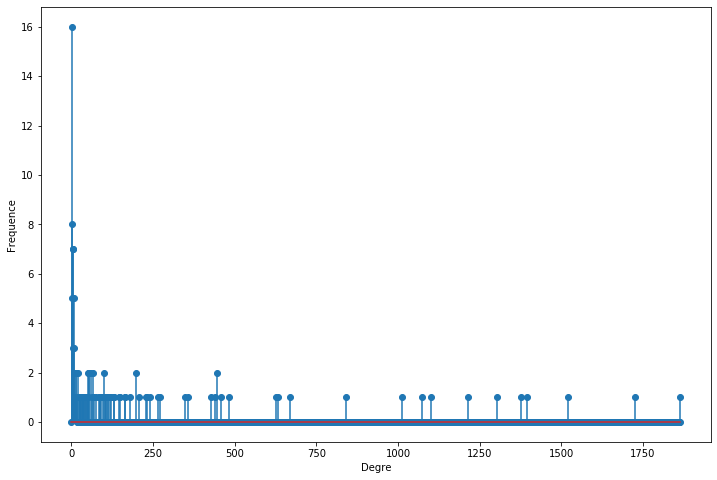

In [165]:
degree_freq = np.array(nx.degree_histogram(g)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq, use_line_collection=True)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

In [154]:
c_degree = nx.degree_centrality(g)
c_degree = list(c_degree.values())

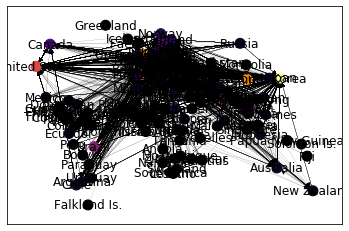

In [159]:
# draw
up = nx.draw_networkx(g,pos,cmap = plt.get_cmap('inferno'),node_color =c_degree, node_size = 100, width=0.1, with_labels=True)

In [112]:
nx.set_node_attributes(g,  pos, 'coord')

In [123]:
g.nodes['United Kingdom']

{'coord': (-2.86563164084, 54.1238715577)}

In [124]:
nx.readwrite.nx_shp.write_shp(g, './../../data/food hazard/')

ValueError: could not convert string to float: 'U'

In [277]:
fin.to_csv('./../../data/FLS_murnged.csv')

-------------------

# We need to export two things

    1. points with the positions (shp, geojson or other)
    2. O-D data (csv) 
        with a structure;

| Origin | Destination | Degree | Other measures |
|:------:|:-----------:|:------:|:--------------:|
|        |             |        |                |
|        |             |        |                |


## number 2. is already done

In [160]:

fin = fin.rename(columns={'loop':'number of links'})
fin.head() # this is the csv


,Country of Origin,Notified by,number of links,x_x,y_x,x_y,y_y
0,Afghanistan,Denmark,1,66.004734,33.835231,10.028010,55.981253
1,Afghanistan,Finland,1,66.004734,33.835231,26.274666,64.498846
2,Afghanistan,Sweden,2,66.004734,33.835231,16.745580,62.779665
3,Afghanistan,United Kingdom,2,66.004734,33.835231,-2.865632,54.123872
4,Albania,Croatia,4,20.049834,41.142450,16.404129,45.080476


In [177]:
fin.to_csv('./../../data/food hazard/FLS_murnged.csv')

## working on the 1.

In [161]:
deg = pd.DataFrame(g.degree)
deg = deg.rename(columns={0:'name', 1:'degree'})
deg

,name,degree
0,United Kingdom,1377
1,Ireland,233
2,Thailand,428
3,Croatia,147
4,Poland,1011
...,...,...
145,Kosovo,1
146,Benin,8
147,Solomon Is.,1
148,Ivory Coast,4


In [162]:
c_degree = nx.degree_centrality(g)
c_degree = pd.DataFrame(c_degree, index=[0]).transpose().reset_index()
c_degree = c_degree.rename(columns={0:'degree_centrality', 'index':'name'})
c_degree

,name,degree_centrality
0,United Kingdom,9.241611
1,Ireland,1.563758
2,Thailand,2.872483
3,Croatia,0.986577
4,Poland,6.785235
...,...,...
145,Kosovo,0.006711
146,Benin,0.053691
147,Solomon Is.,0.006711
148,Ivory Coast,0.026846


In [164]:
o_degree = nx.out_degree_centrality(g)
o_degree = pd.DataFrame(o_degree, index=[0]).transpose().reset_index()
o_degree = o_degree.rename(columns={0:'out_degree', 'index':'name'})
o_degree

i_degree = nx.out_degree_centrality(g)
i_degree = pd.DataFrame(i_degree, index=[0]).transpose().reset_index()
i_degree = i_degree.rename(columns={0:'in_degree', 'index':'name'})
i_degree

,name,in_degree
0,United Kingdom,1.939597
1,Ireland,0.442953
2,Thailand,2.872483
3,Croatia,0.147651
4,Poland,4.577181
...,...,...
145,Kosovo,0.006711
146,Benin,0.053691
147,Solomon Is.,0.006711
148,Ivory Coast,0.026846


In [169]:
pos2 = pd.DataFrame(pos).transpose().reset_index()
pos2 = pos2.rename(columns={0:'x', 1:'y', 'index':'name'})
pos2

,name,x,y
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223960
4,Albania,20.049834,41.142450
...,...,...,...
240,Zimbabwe,29.851441,-19.004204
241,South Korea,126.705208,37.456257
242,Ivory Coast,-4.024429,5.345317
243,Commission Services,0.000000,0.000000


In [172]:
spatial = pos2.merge(deg, on = 'name')
spatial = spatial.merge(c_degree, on = 'name')
spatial = spatial.merge(o_degree, on = 'name')
spatial = spatial.merge(i_degree, on = 'name')
spatial 

,name,x,y,degree,degree_centrality,out_degree,in_degree
0,Afghanistan,66.004734,33.835231,6,0.040268,0.040268,0.040268
1,Angola,17.537368,-12.293361,1,0.006711,0.006711,0.006711
2,Albania,20.049834,41.142450,20,0.134228,0.134228,0.134228
3,Andorra,1.560544,42.542291,1,0.006711,0.006711,0.006711
4,United Arab Emirates,54.300167,23.905282,6,0.040268,0.040268,0.040268
...,...,...,...,...,...,...,...
145,Zimbabwe,29.851441,-19.004204,2,0.013423,0.013423,0.013423
146,South Korea,126.705208,37.456257,98,0.657718,0.657718,0.657718
147,Ivory Coast,-4.024429,5.345317,4,0.026846,0.026846,0.026846
148,Commission Services,0.000000,0.000000,5,0.033557,0.000000,0.000000


In [174]:
spatial = gpd.GeoDataFrame(spatial, geometry = gpd.points_from_xy(spatial.x, spatial.y))

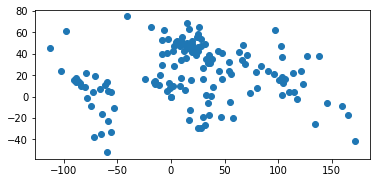

In [175]:
spatial.plot()

In [176]:
spatial.to_file("./../../data/food hazard/points.geojson", driver='GeoJSON')